In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as t

In [2]:
df = pd.read_csv("C:/Users/mishrap6/OneDrive - Zimmer Biomet/Downloads/DS1_C8_Computers_Data_Project (1).csv")

In [3]:
df.head()


,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1


In [4]:
df.shape

(6259, 12)

In [5]:
df.isnull().sum()

# no null,values in the data so no cleasning or missing value treatment needed

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

### Task 1.a
probablity of customer to purchase specs as - 
RAM = 8GB
Screensize = 14 inch
processor - 33 MHz

In [7]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [8]:
total_com_count = df['price'].count()
print("Total No. of Computers:",total_com_count)

required_computers = df[(df['ram'] == 8) & (df['screen'] == 14) & (df['speed'] == 33)]

required_com_count = required_computers['price'].count()
print("total no. of Required Computers:",required_com_count)

Probabillity_of_purchasing_required_com = round((required_com_count/total_com_count),2)

print("Probabillity of purchasing required computers :",Probabillity_of_purchasing_required_com)

Total No. of Computers: 6259
total no. of Required Computers: 376
Probabillity of purchasing required computers : 0.06


### Task 1.b

In [10]:
# Probabillity of selling premium computers

premium_com = df[df['premium']=='yes'].shape[0]

probabillity_of_selling_premium_com = round((premium_com/total_com_count),2)

print("Probabillity of purchasing required computers :",probabillity_of_selling_premium_com)

# given that comp is premium what is the probablity it has cd

premium_com_with_cd = df[(df['premium']=='yes') & (df['cd']=='yes')].shape[0]

probability_of_cd_for_premium_cd = round((premium_com_with_cd/premium_com),2)

print("probability of computers have cd for premium computers:",probability_of_cd_for_premium_cd)

Probabillity of purchasing required computers : 0.9
probability of computers have cd for premium computers: 0.5


### Task 1.c

In [43]:
#1 Probablility of comp have screen > 15 and Premium

premium_com_screen15 = df[(df['premium']=='yes') & (df['screen'] >15)].shape[0]

probability_of_premium_and_screen15 = round((premium_com_screen15/total_com_count),2)
print("The probablilty of computer having screen size greater than 15 inch and its permium computer:", probability_of_premium_and_screen15)


#2 Given that comp is not permium, find probablity of comp having screen size >=14 inch

nonpremium_com = df[(df['premium'] == 'no')]['price'].shape[0]
premium_com = df[(df['premium'] == 'yes')]['price'].shape[0]
print("nonPremium count = ",nonpremium_com)
print("Premium count = ",premium_com)


nonpremium_com_screen_14 = df[(df['premium'] == 'no') & (df['screen'] <= 14)].shape[0]
probablilty_of_nonpremium_com_screen_14 = round((nonpremium_com_screen_14/nonpremium_com),2)
print("The probablilty of computer having screen size less than equal to 14 inch and given computer are non permium computer:", probablilty_of_nonpremium_com_screen_14)

The probablilty of computer having screen size greater than 15 inch and its permium computer: 0.08
nonPremium count =  612
Premium count =  5647
The probablilty of computer having screen size less than equal to 14 inch and given computer are non permium computer: 0.69


### Task 1.d

In [14]:
# 1. What is the joint probablity fo a computer have both Cd and multimedia

total_comp = df.shape[0] # shape[0] to count

cd_multi_comp = df[(df['cd'] == 'yes') & (df['multi']== 'yes')].shape[0]

probablity_of_cd_multi_comp = cd_multi_comp/total_comp

print("Joint probablity of a computer have both CD player and multimedia",round(probablity_of_cd_multi_comp,2))


#2 Given that com has CD player what is the probabilty it also has multiplayer

cd_comp = df[(df['cd'] == 'yes')].shape[0]

cd_comp_with_multi = df[(df['cd'] == 'yes') & (df['multi'] == 'yes')].shape[0]

probablity_of_multi_for_cdcomp = round((cd_comp_with_multi/cd_comp),2)


print("The probablilty of computer having Multiplayer given computer has CD:", probablity_of_multi_for_cdcomp)



Joint probablity of a computer have both CD player and multimedia 0.14
The probablilty of computer having Multiplayer given computer has CD: 0.3


### Task 2.a

In [16]:
#1. Avg price os computer from popultaion

import statistics as st

p_price_mean = st.mean(df['price'])
print("Avg price of computer from whole popultaion:", round(p_price_mean,2))


Avg price of computer from whole popultaion: 2219.58


### Task 2.b

In [24]:


#2. how does avg price of sample vary, when data is sampled using diff sampling technique

#simple random sampling without replacement

sample_size=100

simple_random_without_replacement = df.sample(n=sample_size, random_state = 1)
avg_price_simple_random_without_replacement = st.mean(simple_random_without_replacement['price'])
print("Average price (Simple Random Sampling without replacement):", round(avg_price_simple_random_without_replacement, 2))


#simple random sampling with replacement

simple_random_with_replacement = df.sample(n=sample_size, replace = True,random_state = 1)
avg_price_simple_random_with_replacement = st.mean(simple_random_with_replacement['price'])
print("Average price (Simple Random Sampling with replacement):", round(avg_price_simple_random_with_replacement, 2))


# Systematic Sampling

stepsize = len(df)//sample_size

indexes = np.arange(0, len(df), step = stepsize)
systematic_sample = df.iloc[indexes]
avg_price_systematic = st.mean(systematic_sample['price'])
print("Average price (Systematic Sampling):", round(avg_price_systematic, 2))


# Stratified sampling

stratified_sample = df.groupby('premium', group_keys = False).apply(lambda x:x.sample(min(len(x), sample_size // 2)),include_groups=False)

avg_price_stratified = st.mean(stratified_sample['price'])
print("Average price (Stratified Sampling):", round(avg_price_stratified, 2))


# Cluster Sampling

cluster = df[df['screen'].isin([14, 15])]  # Assuming screen size represents a cluster
cluster_sample = cluster.sample(n=sample_size, random_state=1)
avg_price_cluster = st.mean(cluster_sample['price'])
print("Average price (Cluster Sampling):", round(avg_price_cluster, 2))


Average price (Simple Random Sampling without replacement): 2243.87
Average price (Simple Random Sampling with replacement): 2181.61
Average price (Systematic Sampling): 2217.14
Average price (Stratified Sampling): 2239.22
Average price (Cluster Sampling): 2194.68


### Task 2.c 

In [37]:
#Avg price of premium and non premium com in whole data

avg_price_whole = df.groupby('premium')['price'].mean()
print("Average Price of Premium com are :",round(avg_premium_price['yes'],2))
print("Average Price of non-Premium com are :",round(avg_premium_price['no'],2))


# Avg Price of premium and non premium com in simple random sampling without replacement


avg_price_sample = simple_random_without_replacement.groupby('premium')['price'].mean()
print("Average Price of Premium com from sample data are :",round(avg_price_sample['yes'],2))
print("Average Price of non-Premium com from sample data are :",round(avg_price_sample['no'],2))



Average Price of Premium com are : 2204.15
Average Price of non-Premium com are : 2361.93
Average Price of Premium com from sample data are : 2241.98
Average Price of non-Premium com from sample data are : 2263.0


In [45]:
# checking premium and non premium com count - 

nonpremium_com = df[(df['premium'] == 'no')]['price'].shape[0]
premium_com = df[(df['premium'] == 'yes')]['price'].shape[0]
print("nonPremium count = ",nonpremium_com)
print("Premium count = ",premium_com)

nonPremium count =  612
Premium count =  5647


### Task 2.d

### Interpretations :

The average price of premium computers in whole data and sampled data are close to each other for non-premium computers the mean differece are slighlty high. 

also, the average price of nonpremium com are higher than premium computers.



### Task 3.a

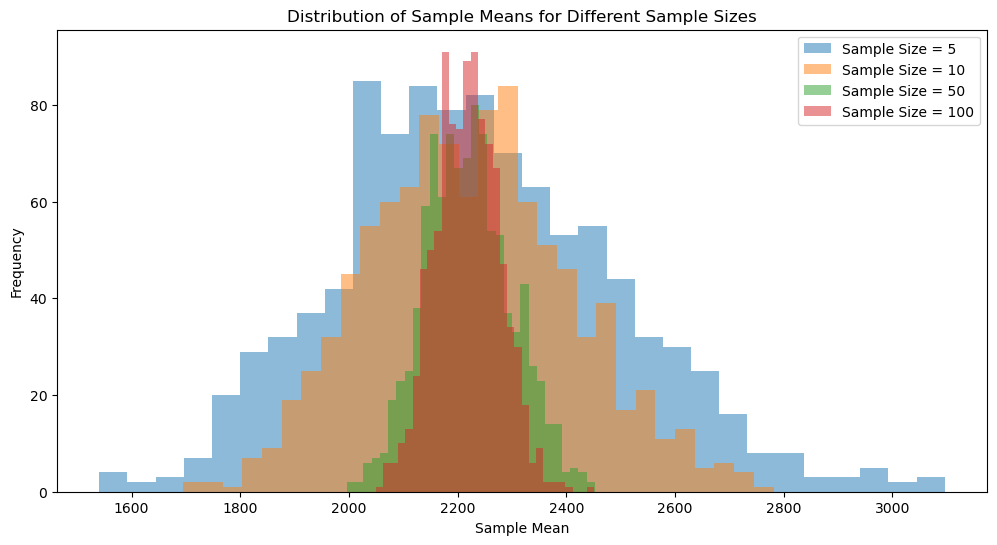

In [49]:

import matplotlib.pyplot as plt

sample_sizes = [5, 10, 50, 100]
price_means = {}

# Simulate sample means for different sizes
for size in sample_sizes:
    sample_means = [df['price'].sample(size, replace=True).mean() for _ in range(1000)]
    price_means[size] = sample_means

# Plot the distributions
plt.figure(figsize=(12, 6))
for size in sample_sizes:
    plt.hist(price_means[size], bins=30, alpha=0.5, label=f"Sample Size = {size}")
plt.title("Distribution of Sample Means for Different Sample Sizes")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Taks 3.b

The distributions for sample sizes 50 and 100 are getting closer to the population mean.

As the sample size increases, the distribution of sample means becomes more concentrated around the population mean, and the spread of the distribution decreases. 
This means that larger sample sizes provide more accurate estimates of the population mean

### Taks 3.c

In [100]:
# Population mean 
population_mean = df['price'].mean()
print("population_mean =", round(population_mean, 2))

# Sample mean
sample_mean = simple_random_without_replacement['price'].mean()
print("sample_mean =", round(sample_mean, 2))


# Sample standard deviation
sample_std_dev = df['price'].std(ddof=1)  # ddof=1 for sample standard deviation
print("\nsample_std_dev=", round((sample_std_dev),2))

# Population standard deviation
population_std_dev = df['price'].std(ddof=0)  # ddof=0 for population standard deviation
print("population_std_dev=", round((population_std_dev),2))

population_mean = 2219.58
sample_mean = 2243.87

sample_std_dev= 580.8
population_std_dev= 580.76


#### If properties of the Central Limit Theorem for the samples are satisfied.
In our study,

1. The sample mean distribution approximates a normal distribution for large sample sizes, regardless of the population distribution.
   
2. The mean of the sample means (2243.87) is close to the population mean (2219.58).

3. Sample standard deviation is equal to population standard deviation.
